In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
# import the data
df = pd.read_csv("Cardiovascula Dataset.csv")

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# Check if there are any missing values in the dataset
df.isnull().values.any()

False

In [11]:
# Check if there is a class imbalance issue or not
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

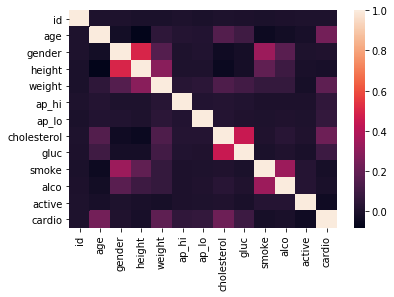

In [13]:
# See if features are correlated 
d_ = df.corr()
sns.heatmap(d_)

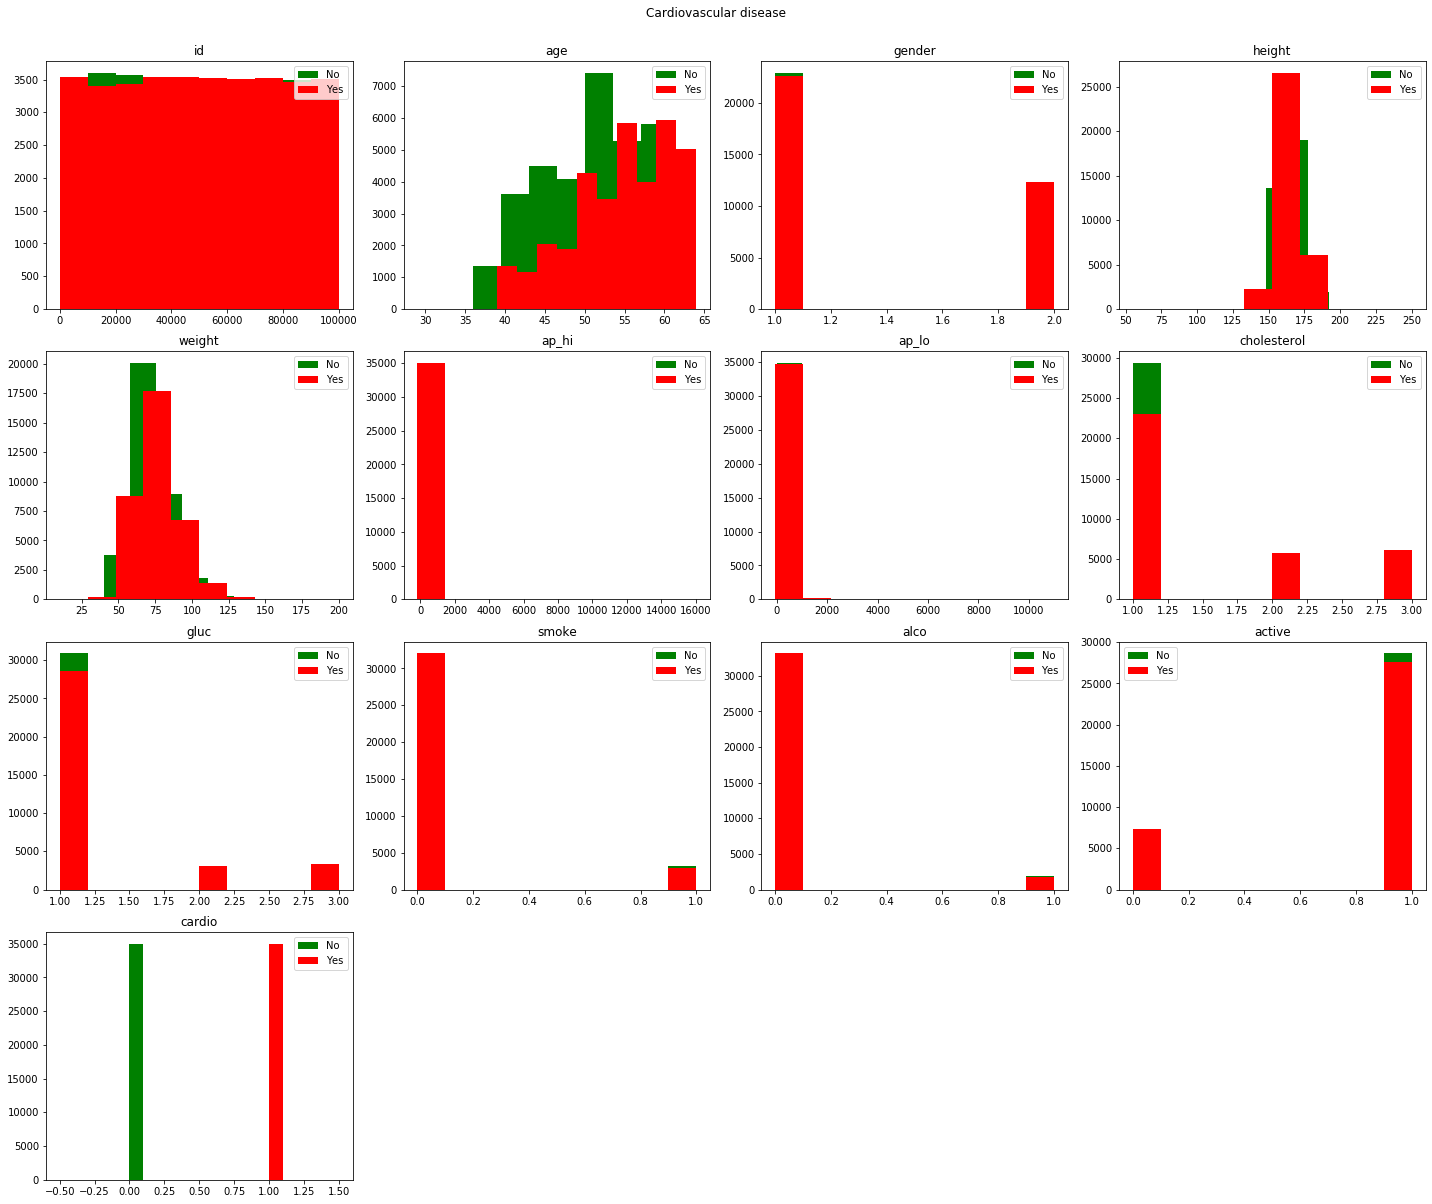

In [18]:
# Let's see the data distribution per feature without any standardization
result = pd.DataFrame()
result['cardio'] = df.iloc[:,-1]

fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    plt.hist(df[i][result['cardio']==0], color='g', label = 'No')
    plt.hist(df[i][result['cardio']==1], color='r', label = 'Yes')
    plt.legend(loc='best')
    plt.title(i)
fig.suptitle('Cardiovascular disease')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [45]:
# Drop the ID columns before building the model 
df = df.drop(['id'], axis=1)

In [79]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    test_size=0.2, random_state=42)


In [80]:
# Sanity check of the amount of data distributed between train and test 
len(X_train), len(y_train), len(X_test), len(y_test)

(56000, 56000, 14000, 14000)

In [48]:
# A Function that returns the precision, recall, F1 and mAP scores for the classifier
def my_metrics(y1, y2):
    precision = precision_score(y1, y2)
    recall = recall_score(y1, y2)
    f1 = f1_score(y1, y2)
    average_precision = average_precision_score(y1, y2)
    return precision, recall, f1, average_precision

### First try a Random Forest and check the performance. 
##### Reason: It is easier to train and doesn't quite require feature standardization either 

In [68]:
#Create a Classifier with k=100 trees
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

# Predict for the test data 
y_pred_rf = clf.predict(X_test)

# Model Accuracy on test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

a0, b0, c0, d0 = my_metrics(y_test, y_pred_rf)
print("Precision: %s ||  Recall: %s  ||  F1-score: %s  ||  mAP: %s  "%(a0, b0, c0, d0))

Accuracy: 0.7089285714285715
Precision: 0.7121803207628955 ||  Recall: 0.702937820878494  ||  F1-score: 0.7075288882509151  ||  mAP: 0.6494041970353309  


('age', 0.1629842459150664)
('gender', 0.0183250984843362)
('height', 0.21156347992111293)
('weight', 0.23187712610478312)
('ap_hi', 0.1899897828738095)
('ap_lo', 0.09428208113469813)
('cholesterol', 0.03906780631821709)
('gluc', 0.018818131966608694)
('smoke', 0.009992830197021501)
('alco', 0.007975060150752744)
('active', 0.015124356933593715)


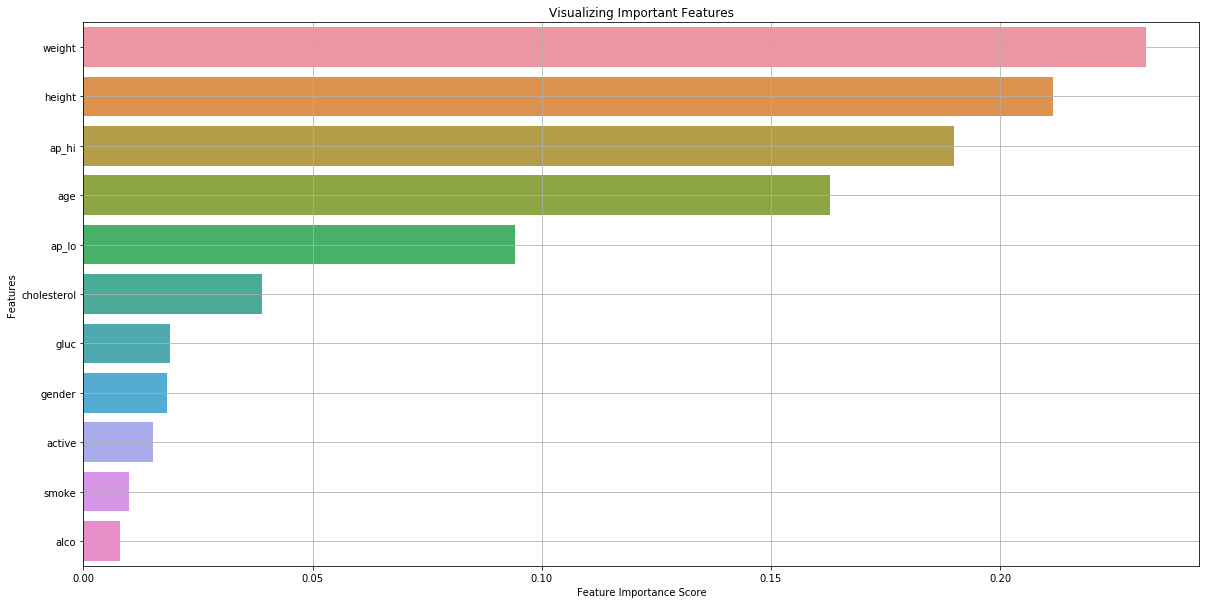

In [55]:
# Plot a feature importance plot for the RF and check which all features proved to be the most useful ones

feature_imp = pd.Series(clf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# Print the name and gini importance of each feature
for feature in zip(df.columns, clf.feature_importances_):
    print(feature)

# Creating a bar plot
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.grid()
plt.show()

/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/v

/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/v

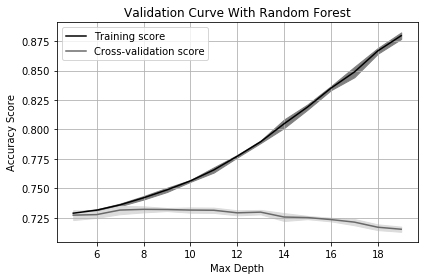

In [65]:
# Hyperparameter tuning using validation curve 
from sklearn.model_selection import validation_curve
# Parameter to tune: Max_Depth

param_range = range(5, 20) # Search space 

train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range, cv = 3)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.grid()
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### From the above validation curve we can note that the best validation score is obtained at max depth of 7. 

We can perform this hyperparamter search for various other hyperparameters like number_of_estimators, min_sample_split, min_sample_leaf, etc. But due to time constraint, I did it for one of the most important one - Max_depth.

#### Now retrain a random forest classifier with max_depth = 7

In [67]:
#Create a Classifier with k=100 trees
clf_mod=RandomForestClassifier(n_estimators=100, max_depth=7)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_mod.fit(X_train, y_train)

# Predict for the test data 
y_pred_rf_mod = clf_mod.predict(X_test)

# Model Accuracy on test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_mod))

a1, b1, c1, d1 = my_metrics(y_test, y_pred_rf_mod)
print("Precision: %s ||  Recall: %s  ||  F1-score: %s  ||  mAP: %s  "%(a1, b1, c1, d1))

Accuracy: 0.7379285714285714
Precision: 0.771391459652541 ||  Recall: 0.6775527666856817  ||  F1-score: 0.7214334522815277  ||  mAP: 0.6841584176852855  


#### Thus we were able to improve our precision from 71% to 77% by doing a hyperparameter search over the max_depth parameter. 

## Trying a Logistic Regression Classifier to see if it outperforms the RF classifier

In [70]:
# Since logistic regression classifier works well on standardized data (as it is doing a gradient based learning)
# we will first standardize a few features and then train the model 

# DESCRIPTION OF EACH FEATURE
# 1. Age | Objective Feature | age | int (days)
# 2. Height | Objective Feature | height | int (cm) |
# 3. Weight | Objective Feature | weight | float (kg) |
# 4. Gender | Objective Feature | gender | categorical code |
# 5. Systolic blood pressure | Examination Feature | ap_hi | int |
# 6. Diastolic blood pressure | Examination Feature | ap_lo | int |
# 7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# 8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# 9. Smoking | Subjective Feature | smoke | binary |
# 10. Alcohol intake | Subjective Feature | alco | binary |
# 11. Physical activity | Subjective Feature | active | binary |
# 12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



from sklearn.preprocessing import StandardScaler

# Define a standard scaler that transforms the data to a N(0,1) distribution
scaler = StandardScaler()
# Fit the scaler to the training data 
scaler.fit(X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
# Transform the training data
X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.transform(X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
# Transform the test data BUT using the training scalar
X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.transform(X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])


In [73]:
# Sanity check of the amount of data distributed between train and test 
len(X_train), len(y_train), len(X_test), len(y_test)

(56000, 56000, 14000, 14000)

In [75]:
# Build the logistic regression model 
model_lr = LogisticRegression(solver='lbfgs', penalty='l2')
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

# Model Accuracy on test data
print("Accuracy of Logsitic Regression:",metrics.accuracy_score(y_test, y_pred_lr))

print("Scores for Logistic Regression")
a2, b2, c2, d2 = my_metrics(y_test, y_pred_lr)
print("Precision: %s ||  Recall: %s  ||  F1-score: %s  ||  mAP: %s  "%(a2, b2, c2, d2))

Accuracy of Logsitic Regression: 0.7227142857142858
Scores for Logistic Regression
Precision: 0.7446076899030947 ||  Recall: 0.679406731317741  ||  F1-score: 0.7105145413870246  ||  mAP: 0.6664629052825443  


In [77]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_1 = svm.SVC(kernel='linear') # Linear Kernel
clf_2 = svm.SVC(kernel='rbf') # Radial Basis/Gaussian Kernel

#Train the model using the training sets
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm_linear = clf_1.predict(X_test)
y_pred_svm_rbf = clf_2.predict(X_test)

# Model Accuracy on test data
print("Accuracy of SVM on Linear Kernel:",metrics.accuracy_score(y_test, y_pred_svm_linear))
print("Accuracy of SVM on RBF Kernel:",metrics.accuracy_score(y_test, y_pred_svm_rbf))

print("Scores for Linear SVM")
a3, b3, c3, d3 = my_metrics(y_test, y_pred_svm_linear)
print("Precision: %s ||  Recall: %s  ||  F1-score: %s  ||  mAP: %s  "%(a3, b3, c3, d3))
print("********")
print("Scores for RBF SVM")
a4, b4, c4, d4 = my_metrics(y_test, y_pred_svm_rbf)
print("Precision: %s ||  Recall: %s  ||  F1-score: %s  ||  mAP: %s  "%(a4, b4, c4, d4))

/Users/vikramanksingh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on Linear Kernel: 0.7264285714285714
Accuracy of SVM on RBF Kernel: 0.7360714285714286
Scores for Linear SVM
Precision: 0.773179945054945 ||  Recall: 0.6421848260125499  ||  F1-score: 0.7016204425054533  ||  mAP: 0.6757387142057885  
********
Scores for RBF SVM
Precision: 0.752935793808144 ||  Recall: 0.7040787221905305  ||  F1-score: 0.7276881126096248  ||  mAP: 0.6783403573102365  


Average precision-recall score for a Linear SVM: 0.68
Average precision-recall score for a RBF SVM: 0.68
Average precision-recall score for a Random Forest: 0.68
Average precision-recall score for a Logistic Regression: 0.67
 *******************
AUC score for a Linear SVM: 0.73
AUC score for a RBF SVM: 0.74
AUC score for a Random Forest: 0.74
AUC score for a Logistic Regression: 0.72


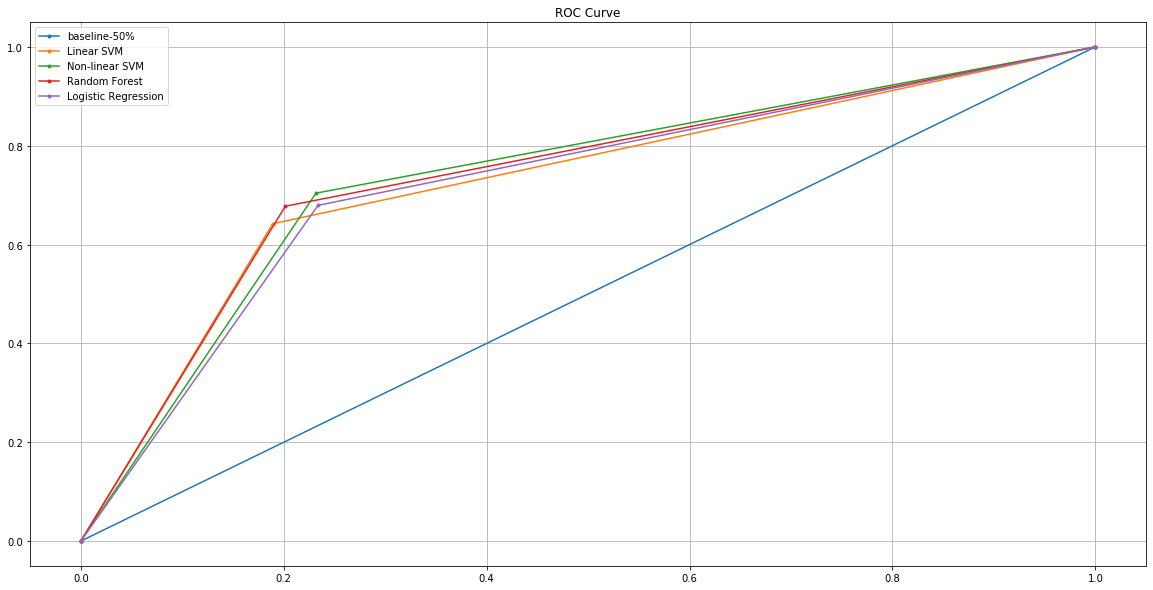

In [78]:
# Evaluation of performances of interpretable models

average_precision_svm_linear = average_precision_score(y_test, y_pred_svm_linear)
average_precision_svm_rbf = average_precision_score(y_test, y_pred_svm_rbf)
average_precision_rf = average_precision_score(y_test, y_pred_rf_mod)
average_precision_lr = average_precision_score(y_test, y_pred_lr)

print('Average precision-recall score for a Linear SVM: {0:0.2f}'.format(average_precision_svm_linear))
print('Average precision-recall score for a RBF SVM: {0:0.2f}'.format(average_precision_svm_rbf))
print('Average precision-recall score for a Random Forest: {0:0.2f}'.format(average_precision_rf))
print('Average precision-recall score for a Logistic Regression: {0:0.2f}'.format(average_precision_lr))

print(" *******************")
ns_probs = [0 for _ in range(len(y_test))]

lr_auc = roc_auc_score(y_test, y_pred_lr)
rf_auc = roc_auc_score(y_test, y_pred_rf_mod)
svm_linear_auc = roc_auc_score(y_test, y_pred_svm_linear)
svm_rbf_auc = roc_auc_score(y_test, y_pred_svm_rbf)

print('AUC score for a Linear SVM: {0:0.2f}'.format(svm_linear_auc))
print('AUC score for a RBF SVM: {0:0.2f}'.format(svm_rbf_auc))
print('AUC score for a Random Forest: {0:0.2f}'.format(rf_auc))
print('AUC score for a Logistic Regression: {0:0.2f}'.format(lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf_mod)
svm_linear_fpr, svm_linear_tpr, _ = roc_curve(y_test, y_pred_svm_linear)
svm_rbf_fpr, svm_rbf_tpr, _ = roc_curve(y_test, y_pred_svm_rbf)

plt.figure(figsize=(20,10))
plt.plot(ns_fpr, ns_tpr, marker='.', label='baseline-50%')
plt.plot(svm_linear_fpr, svm_linear_tpr, marker='.', label='Linear SVM')
plt.plot(svm_rbf_fpr, svm_rbf_tpr, marker='.', label='Non-linear SVM')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

plt.grid()
plt.title("ROC Curve")
plt.legend()
plt.show()


## Results:

#### From the ROC-AUC Curve we saw that Non-linear SVM and the Random Forest, both gave similar performance on the test dataset and hence the recommendation would be to go with either one of those. 

#### I have tested a variety of models but have intentionally kept the model family to include only the interpretable models as we care about the interpretation of the model's output as to why it is classifying a person as having the disease or not. 

#### It is easier to interpret the "WHY" from this model class as compared to deep learning methods where we would perform a basis function expansion to increase the feature space but have less intrepretability of the results. 

#### We can use other techniques to perform an analysis of model interpretability like PDP Plots, ACE plots, M-plots etc. 